In [1]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.regularizers import l2
from sklearn import datasets
import sklearn
import pandas as pd
import numpy as np
print(tf.__version__)

2.3.1


## Load Data
First get the data.  Sklearn presents the data in a dictionary.  

The target is the price is thousands

Note that X is a dataframe while y is an array!!

In [3]:
cal=datasets.fetch_california_housing()

In [4]:
x = pd.DataFrame(cal['data'])

In [5]:
x.columns=cal['feature_names']

In [6]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y = cal['target']

In [8]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

## Scale Data

Neural Networks are especially sensitive do data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[7], scaler.min_[7]))
multiplied_by = scaler.scale_[7]
added = scaler.min_[7]

scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)

Note: median values were scaled by multiplying by 0.0996015936 and adding 12.385458


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

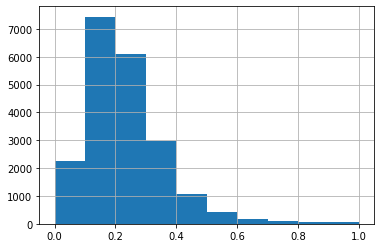

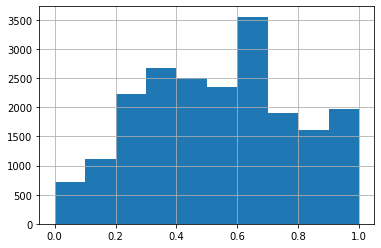

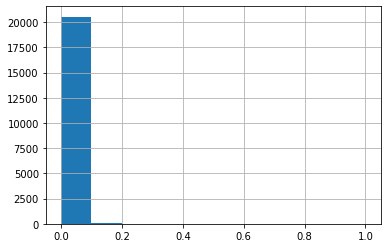

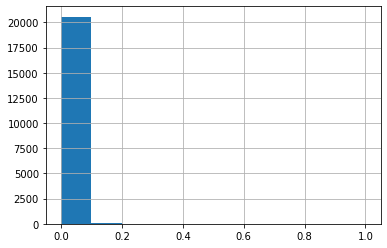

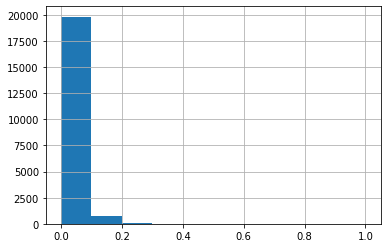

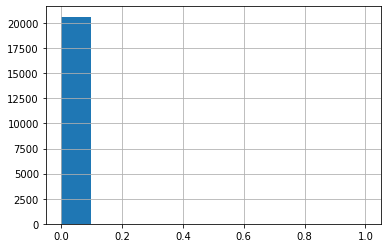

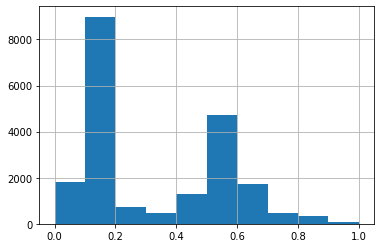

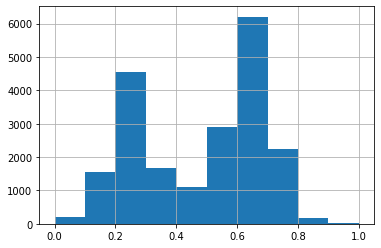

In [11]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

Nueral Networks generally are one of the slowest methods, thus a full CV is not always feasable.  FOr this example, it is not nessecary, but will be done for practice.  Large samples generally have 2 splits: training and validation.  Using this nominclature, validation is your "test" set there is NEVER used to build a model

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=1776)

## Model 
Alright lets get down to business.  We will use the Sequential() class to build a model.  This means we just add layer after layer to the model (in order).

Note that this is NOT the keras package proper.  This is an implementation of the Keras API in tensorflow.  THey are closely related, but this IS Tensorflow (package), not Keras (package)

In [13]:
x_train.shape

(16512, 8)

Sequential allows use to build a network layer by layer.  It automatically assumes that any layer you add is connected to the previous layer.  Notice we do not specify the input size.  Until we run the .fit() method, the full "graph" or set of matrix operations is not built.  

Once we have fit the model, we can call the .summary() method to get details about our model.

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(8,)))
model.add(layers.Dense(100,activation='relu'))  # adds a layer with 100 neurons, tanh activation
model.add(layers.Dense(50, activation='relu'))   # adds a layer with 50 neurons, tanh activation
model.add(layers.Dense(1, activation='linear'))  # adds a layer with 1 neurons, linear (aka NO) activation



## Compile Model

The compile step adds an optimizer (solver) and your loss metrics.

In [16]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])

## Fit model
Now it is time to train

In [17]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test), batch_size=13)

Epoch 1/10
1271/1271 [==============================] - 4s 3ms/step - loss: 0.7506 - mean_squared_error: 0.7506 - mean_absolute_error: 0.6425 - val_loss: 0.5327 - val_mean_squared_error: 0.5327 - val_mean_absolute_error: 0.5148
Epoch 2/10
1271/1271 [==============================] - 4s 3ms/step - loss: 0.5384 - mean_squared_error: 0.5384 - mean_absolute_error: 0.5346 - val_loss: 0.4904 - val_mean_squared_error: 0.4904 - val_mean_absolute_error: 0.4963
Epoch 3/10
1271/1271 [==============================] - 4s 3ms/step - loss: 0.5193 - mean_squared_error: 0.5193 - mean_absolute_error: 0.5208 - val_loss: 0.4878 - val_mean_squared_error: 0.4878 - val_mean_absolute_error: 0.5281
Epoch 4/10
1271/1271 [==============================] - 4s 3ms/step - loss: 0.5088 - mean_squared_error: 0.5088 - mean_absolute_error: 0.5146 - val_loss: 0.5300 - val_mean_squared_error: 0.5300 - val_mean_absolute_error: 0.4879
Epoch 5/10
1271/1271 [==============================] - 4s 3ms/step - loss: 0.4996 - mea

Now look at the history of the model--your train/test (aka validation) curves

In [18]:
model.history.history


{'loss': [0.7506486177444458,
  0.5384423136711121,
  0.5193061828613281,
  0.5087617635726929,
  0.4996110796928406,
  0.496423602104187,
  0.4896334409713745,
  0.4866578280925751,
  0.4817618727684021,
  0.478682279586792],
 'mean_squared_error': [0.7506486177444458,
  0.5384423136711121,
  0.5193061828613281,
  0.5087617635726929,
  0.4996110796928406,
  0.496423602104187,
  0.4896334111690521,
  0.4866578280925751,
  0.4817618727684021,
  0.47868233919143677],
 'mean_absolute_error': [0.6424880623817444,
  0.5345945954322815,
  0.5208017826080322,
  0.5145820379257202,
  0.5095257759094238,
  0.5058856010437012,
  0.5021698474884033,
  0.49924781918525696,
  0.4971589744091034,
  0.49392491579055786],
 'val_loss': [0.5327072739601135,
  0.4903790354728699,
  0.48781344294548035,
  0.5300101637840271,
  0.5435277223587036,
  0.6211035251617432,
  0.501413106918335,
  0.4829612672328949,
  0.47892242670059204,
  0.5154045224189758],
 'val_mean_squared_error': [0.5327072739601135,
  

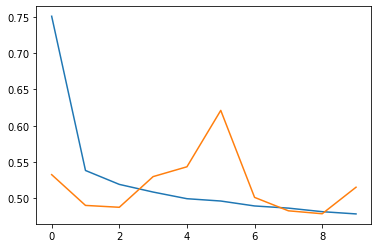

In [19]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________


## Visualize that data
Tensorboard allows you to look at your training curves in real time.  All we need to do here is add a "callback" that is executed every epoch end.  Tensorboard writes a summary of the model output.  If you manually build a neural network, you need to add tf.summary operations.

To run tensorboard type

`tensorboard --logdir logs`

Then go to localhost:6006 in your web browser 

or use the "magic" commands in jupyter below

In [21]:
from time import time
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs\\{time()}")
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 17900), started 4:36:44 ago. (Use '!kill 17900' to kill it.)

In [22]:
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [23]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test), batch_size=10, callbacks=[tb])

Epoch 1/10
   1/1652 [..............................] - ETA: 0s - loss: 0.4240 - mean_squared_error: 0.4240WARNING:tensorflow:From G:\.2020\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1652/1652 [==============================] - 5s 3ms/step - loss: 0.4617 - mean_squared_error: 0.4617 - val_loss: 0.4271 - val_mean_squared_error: 0.4271
Epoch 2/10
1652/1652 [==============================] - 5s 3ms/step - loss: 0.4440 - mean_squared_error: 0.4440 - val_loss: 0.4485 - val_mean_squared_error: 0.4485
Epoch 3/10
1652/1652 [==============================] - 5s 3ms/step - loss: 0.4329 - mean_squared_error: 0.4329 - val_loss: 0.4046 - val_mean_squared_error: 0.4046
Epoch 4/10
1652/1652 [==============================] - 5s 3ms/step - loss: 0.4246 - mean_squared_error: 0.4246 - val_loss: 0.4358 - val_mean_squa

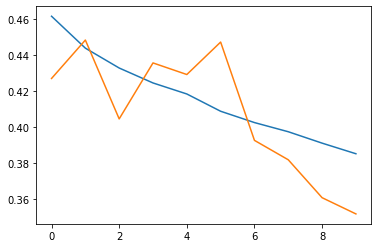

In [24]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

## Classification?
The only thing we really need to change is the final layer to predict classes

In [43]:
model_iris = tf.keras.Sequential()

model_iris.add(layers.Dense(10, activation='relu',kernel_initializer='zeros'))
model_iris.add(layers.Dense(3 ,activation='sigmoid'),)

model_iris.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [44]:
iris = datasets.load_iris()

In [45]:
x= iris['data']
y = iris['target']
# Why do I not have to scale?
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1776)

In [46]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
 model_iris.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=4, callbacks=[tb])

Epoch 1/100
30/30 [==============================] - 0s 16ms/step - loss: 1.0988 - accuracy: 0.2917 - val_loss: 1.0988 - val_accuracy: 0.3000
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0987 - accuracy: 0.3000 - val_loss: 1.0988 - val_accuracy: 0.3000
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0986 - accuracy: 0.3417 - val_loss: 1.0988 - val_accuracy: 0.3000
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0986 - accuracy: 0.3417 - val_loss: 1.0989 - val_accuracy: 0.3000
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 1.0986 - accuracy: 0.3417 - val_loss: 1.0989 - val_accuracy: 0.3000
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0986 - accuracy: 0.3417 - val_loss: 1.0989 - val_accuracy: 0.3000
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 1.0986 - accuracy: 0.3417 - val_loss: 1.0990 - val_accuracy: 0.3000
Epoch 8/100


30/30 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.3417 - val_loss: 1.0999 - val_accuracy: 0.3000
Epoch 56/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.3417 - val_loss: 1.0999 - val_accuracy: 0.3000
Epoch 57/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.3417 - val_loss: 1.0999 - val_accuracy: 0.3000
Epoch 58/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.3417 - val_loss: 1.0999 - val_accuracy: 0.3000
Epoch 59/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.3417 - val_loss: 1.0999 - val_accuracy: 0.3000
Epoch 60/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.3417 - val_loss: 1.1000 - val_accuracy: 0.3000
Epoch 61/100
30/30 [==============================] - 0s 4ms/step - loss: 1.0986 - accuracy: 0.3417 - val_loss: 1.1000 - val_accuracy: 0.3000
Epoch 62/100
30/30 

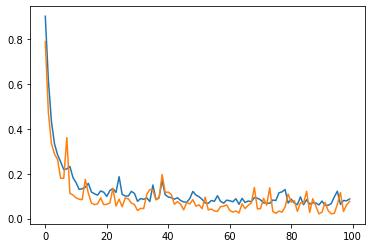

In [35]:
train_loss = model_iris.history.history['loss']
val_loss = model_iris.history.history['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

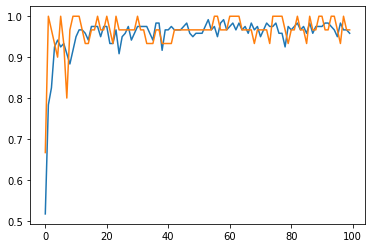

In [36]:
train_acc = model_iris.history.history['accuracy']
val_acc = model_iris.history.history['val_accuracy']
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

#### But WAIT!! There's more
Tensorflow has a ton of options to build a model.  The other useful way is called "model"  It allows a bit more fine grained control.  Notice how I created a "skip layer" that takes the output of layer1 and layer2, combines them and sends them to the output.  This is traditionally used more in Advanced Neural Networks with Convolutional or Recurrent architectures.  This is just a toy example.

In [48]:
model_new = tf.keras.Model()
inputs = tf.keras.Input(shape=(4,))  #notice i have to tell the input shape. I got away with NOT doing that in sequential
x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
layer1 = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
layer2 = tf.keras.layers.Dense(10, activation=tf.nn.relu)(layer1)
joined = tf.keras.layers.Concatenate(axis=1)([layer1,layer2])
outputs = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(joined)
model_new = tf.keras.Model(inputs=inputs, outputs=outputs)
model_new.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model_new.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=4, callbacks=[tb])

Epoch 1/100
30/30 [==============================] - 1s 18ms/step - loss: 1.0981 - accuracy: 0.3417 - val_loss: 0.9828 - val_accuracy: 0.4000
Epoch 2/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9678 - accuracy: 0.3667 - val_loss: 0.9530 - val_accuracy: 0.3000
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 0.9398 - accuracy: 0.3333 - val_loss: 0.9220 - val_accuracy: 0.2667
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.9105 - accuracy: 0.3583 - val_loss: 0.8876 - val_accuracy: 0.4667
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 0.8790 - accuracy: 0.5000 - val_loss: 0.8513 - val_accuracy: 0.5333
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 0.8436 - accuracy: 0.5583 - val_loss: 0.8162 - val_accuracy: 0.6000
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 0.8140 - accuracy: 0.6750 - val_loss: 0.7723 - val_accuracy: 0.6333
Epoch 8/100


Epoch 56/100
30/30 [==============================] - 0s 4ms/step - loss: 0.2925 - accuracy: 0.8917 - val_loss: 0.2866 - val_accuracy: 0.9000
Epoch 57/100
30/30 [==============================] - 0s 4ms/step - loss: 0.2942 - accuracy: 0.9083 - val_loss: 0.2753 - val_accuracy: 0.9000
Epoch 58/100
30/30 [==============================] - 0s 4ms/step - loss: 0.2811 - accuracy: 0.9000 - val_loss: 0.2770 - val_accuracy: 0.9000
Epoch 59/100
30/30 [==============================] - 0s 5ms/step - loss: 0.2889 - accuracy: 0.8833 - val_loss: 0.3409 - val_accuracy: 0.8667
Epoch 60/100
30/30 [==============================] - 0s 6ms/step - loss: 0.2757 - accuracy: 0.9000 - val_loss: 0.2536 - val_accuracy: 0.8667
Epoch 61/100
30/30 [==============================] - 0s 5ms/step - loss: 0.2727 - accuracy: 0.8917 - val_loss: 0.2648 - val_accuracy: 0.9000
Epoch 62/100
30/30 [==============================] - 0s 5ms/step - loss: 0.2616 - accuracy: 0.9000 - val_loss: 0.2434 - val_accuracy: 0.8667
Epoch 

In [49]:
model_new.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 4)            20          input_2[0][0]                    
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 10)           50          dense_13[0][0]                   
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 10)           110         dense_14[0][0]                   
_______________________________________________________________________________________

### Lets go Crazy.  

You can control EVERY part of the loop.  USually not nessecary, but be aware \


In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 120
train_dataset = tf.data.Dataset.from_tensor_slices((iris['data'],iris['target']))
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [ ]:
features, labels = next(iter(train_dataset))
plt.scatter(features[:,0],
            features[:,2],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

   

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])



In [ ]:
predictions = model(features)
predictions[:5]

In [ ]:
tf.nn.softmax(predictions[:5])


In [ ]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:

def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

In [ ]:

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

In [ ]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []
T
num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))